# Zillow Exploration

For MVP: baths, beds, sq_ft, fips, yearbuilt, logerror

If we have time: fullbaths, latitude, longitude, rooms, garagecarcnt, tax_value

In [1]:
# imports
import wrangle_stewart_01 as wr
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats


In [2]:
# get data
zillow = wr.wrangle_zillow(0.6, 0.8)
zillow

/Users/sostew/codeup-data-science/zillow-clustering-project/wrangle_stewart_01.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zillow_filt = zillow_filt[(zillow.baths > 0) & (zillow.sq_ft > 300) & (zillow.beds > 0)]


,baths,beds,sq_ft,fips,fullbaths,latitude,longitude,rooms,yearbuilt,tax_value,logerror,transactiondate,fips_loc
0,3.5,4.0,3100.0,6059,3.0,33634931.0,-117869207.0,0.0,1998.0,1023282.0,0.025595,2017-01-01,"Orange, CA"
1,1.0,2.0,1465.0,6111,1.0,34449266.0,-119281531.0,5.0,1967.0,464000.0,0.055619,2017-01-01,"Ventura, CA"
2,2.0,3.0,1243.0,6059,2.0,33886168.0,-117823170.0,6.0,1962.0,564778.0,0.005383,2017-01-01,"Orange, CA"
3,3.0,4.0,2376.0,6037,3.0,34245180.0,-118240722.0,0.0,1970.0,145143.0,-0.103410,2017-01-01,"Los Angeles, CA"
4,3.0,3.0,1312.0,6037,3.0,34185120.0,-118414640.0,0.0,1964.0,119407.0,0.006940,2017-01-01,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,3.0,3.0,1741.0,6037,3.0,34202400.0,-118502000.0,0.0,1980.0,379000.0,-0.002245,2017-09-20,"Los Angeles, CA"
77376,2.0,2.0,1286.0,6037,2.0,34245368.0,-118282383.0,0.0,1940.0,354621.0,0.020615,2017-09-20,"Los Angeles, CA"
77377,2.0,4.0,1612.0,6111,2.0,34300140.0,-118706327.0,7.0,1964.0,67205.0,0.013209,2017-09-21,"Ventura, CA"
77378,1.0,3.0,1032.0,6037,1.0,34040895.0,-118038169.0,0.0,1954.0,49546.0,0.037129,2017-09-21,"Los Angeles, CA"


#### Question 1: What are the individual distributions of the features?

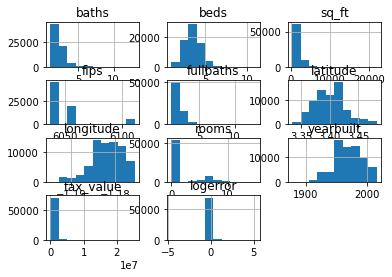

In [3]:
# view individual distributions of features
zillow.hist();

#### Answer 1:
- `bedroomcnt`, `yearbuilt` are normally distributed.
- There are outliers in `calculatedfinishedsquarefeet`, `bathroomcnt`, `bedroomcnt`, `fullbathcnt`, `roomcnt`, and `taxvaluedollarcnt`.
 - Removing outliers from `bathroomcnt` and `bedroomcnt` resolved the outlier issue for `roomcnt`.
- `taxvaluedollarcnt` has the biggest outlier problem
- Data needs to be scaled

At this point, I want to remove outliers since I intend to use clustering with this data. Once that has been completed, and before moving onto multivariate analysis, I will split the data.

In [4]:
# function to remove outliers
def remove_outliers(df, cols, k):
    '''
    This function takes in a list of column names from a dataframe and a 
    k-value which is used to specify the upper and lower bounds for
    removing outliers. It returns the dataframe with the outliers removed.
    '''
    # make for loop to remove outliers in each column
    for col in cols:
        # get quartiles
        q1, q3 = df[col].quantile([.25, .75])
        # compute iqr
        iqr = q3 - q1
        # get cutoff points for removing outliers
        upper = q3 + k * iqr
        lower = q1 - k * iqr
        # remove outliers
        df = df[(df[col]>lower)&(df[col]<upper)]
    return df

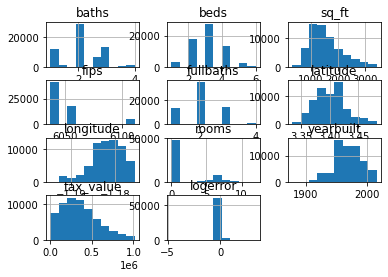

In [5]:
# remove outliers
zillow = remove_outliers(zillow, ['sq_ft', 'baths', 'beds',
                        'fullbaths', 'tax_value'], 1.5)
# view updated distributions
zillow.hist();

In [6]:
# function to split data
def split_data(df):
    '''
    This function takes in a dataframe and splits it into three dataframes.
    It returns these dataframes in this order: train, validate, test.
    Train makes up 56% of the total observations, validate 24%, and test 20%.
    '''
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(df, test_size=0.2, random_state=123)
    train, validate = train_test_split(train, test_size=0.3, random_state=123)
    return train, validate, test
# split data
train, validate, test = split_data(zillow)
# preview train
train.head()

,baths,beds,sq_ft,fips,fullbaths,latitude,longitude,rooms,yearbuilt,tax_value,logerror,transactiondate,fips_loc
18818,3.0,3.0,1683.0,6037,3.0,33874056.0,-118365638.0,0.0,1986.0,331062.0,-0.009760,2017-03-21,"Los Angeles, CA"
52227,2.0,3.0,1085.0,6037,2.0,34616142.0,-117811587.0,0.0,1987.0,109644.0,-0.023405,2017-06-30,"Los Angeles, CA"
25353,3.0,3.0,2030.0,6037,3.0,34135615.0,-118502375.0,0.0,1966.0,127529.0,-0.009772,2017-04-11,"Los Angeles, CA"
73264,2.0,3.0,1652.0,6059,2.0,33945258.0,-117942079.0,7.0,1959.0,180075.0,-0.021081,2017-09-01,"Orange, CA"
56877,2.0,3.0,1684.0,6037,2.0,34212322.0,-118214747.0,0.0,1942.0,81966.0,-0.006403,2017-07-14,"Los Angeles, CA"


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
baths,35820.0,2.110022e+00,0.713316,1.000000e+00,2.000000e+00,2.000000e+00,2.500000e+00,4.000000e+00
beds,35820.0,2.908766e+00,0.919858,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,6.000000e+00
sq_ft,35820.0,1.561935e+03,580.593383,3.600000e+02,1.140000e+03,1.445000e+03,1.878000e+03,3.419000e+03
fips,35820.0,6.049210e+03,20.798716,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
fullbaths,35820.0,2.045812e+00,0.706995,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
latitude,35820.0,3.400989e+07,271600.145275,3.333953e+07,3.381134e+07,3.401123e+07,3.418221e+07,3.481240e+07
longitude,35820.0,-1.181901e+08,360632.180498,-1.194753e+08,-1.184040e+08,-1.181557e+08,-1.179170e+08,-1.175546e+08
rooms,35820.0,1.583836e+00,2.851437,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01
yearbuilt,35820.0,1.968793e+03,22.342519,1.880000e+03,1.954000e+03,1.970000e+03,1.986000e+03,2.016000e+03
tax_value,35820.0,3.607558e+05,219639.397207,1.000000e+03,1.896480e+05,3.289685e+05,4.932275e+05,1.016324e+06


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35820 entries, 18818 to 69286
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   baths            35820 non-null  float64
 1   beds             35820 non-null  float64
 2   sq_ft            35820 non-null  float64
 3   fips             35820 non-null  int64  
 4   fullbaths        35820 non-null  float64
 5   latitude         35820 non-null  float64
 6   longitude        35820 non-null  float64
 7   rooms            35820 non-null  float64
 8   yearbuilt        35820 non-null  float64
 9   tax_value        35820 non-null  float64
 10  logerror         35820 non-null  float64
 11  transactiondate  35820 non-null  object 
 12  fips_loc         35820 non-null  object 
dtypes: float64(10), int64(1), object(2)
memory usage: 3.8+ MB


#### Question 2: Is there a relationship between `logerror` and `yearbuilt`?

- Maybe values of homes built during a certain time period are more difficult to accurately predict.

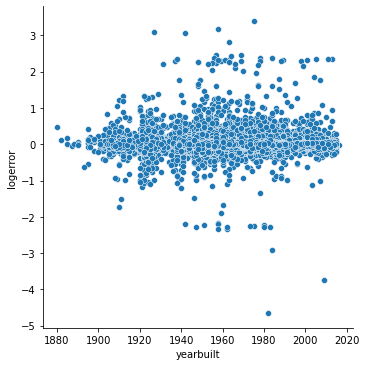

In [9]:
sns.relplot(data=train, x='yearbuilt', y='logerror')

There doesn't appear to be much of a relationship between `yearbuilt` and `logerror`. To be sure, though, I'll run a statistical test.

- $H_{0}$: There is not a significant linear relationship between `yearbuilt` and `logerror`.
- $H_{a}$: There is a significant linear relationship between `yearbuilt` and `logerror`.

In [10]:
alpha = 0.05
corr, p = stats.pearsonr(train.yearbuilt, train.logerror)
corr, p

(-0.001624855713391017, 0.7584533373695889)

#### Answer 2: Based on the visualization and the results of the correlation test, there is not a significant linear relationship between yearbuilt and logerror.

#### Question 3: Is there a relationship between `logerror` and `calculatedfinishedsquarefeet`?

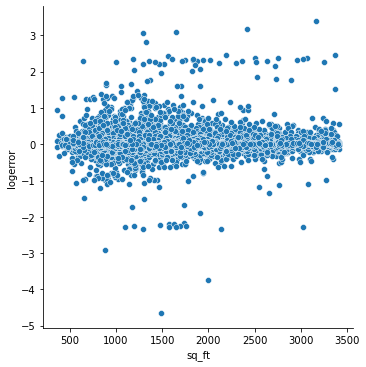

In [11]:
sns.relplot(data=train, x='sq_ft', y='logerror')

At first glance, it appears there is some relationship between `logerror` and `calculatedfinishedsquarefeet`. Next, I'll run a correlation test to be sure there is a significant linear relationship.

- $H_{0}$: There is not a significant linear relationship between `logerror` and `calculatedfinishedsquarefeet`.
- $H_{a}$: There is a significant linear relationship between `logerror` and `calculatedfinishedsquarefeet`.

In [12]:
corr, p = stats.pearsonr(train.logerror, train.sq_ft)
corr, p

(0.028487639364972388, 6.94740798448128e-08)

#### Answer 3: There is a significant linear relationship between `logerror` and `calculatedfinishedsquarefeet`.

Based on the visualization and the results of the correlation test, I conclude there is a significant linear relationship between these two variables. It seems as though smaller homes are more likely to have greater error in their predicted value.

#### Question 4: Does `logerror` differ based on the property's county?

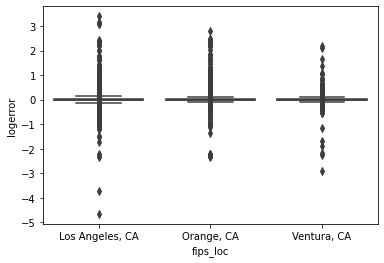

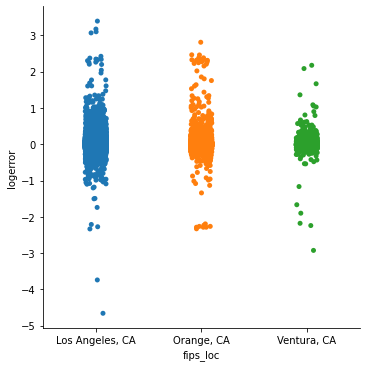

In [13]:
sns.boxplot(data=train, x='fips_loc', y='logerror')
sns.catplot(data=train, x='fips_loc', y='logerror')

There does appear to be somewhat of a difference in logerror between the three counties included in this data. I'll run a statistical test to be sure.

- $H_{0}$: There is not a significant difference in mean logerror across the three counties.
- $H_{a}$: There is a significant difference in mean logerror across the three counties.

In [14]:
# make separate dataframes for each county's data
la_county_data = train[train.fips_loc == 'Los Angeles, CA']
orange_county_data = train[train.fips_loc == 'Orange, CA']
ventura_county_data = train[train.fips_loc == 'Ventura, CA']

In [15]:
print(f'LA County Logerror Variance: {la_county_data.logerror.var()}')
print(f'Orange County Logerror Variance: {orange_county_data.logerror.var()}')
print(f'Ventura County Logerror Variance: {ventura_county_data.logerror.var()}')

LA County Logerror Variance: 0.02351486566938578
Orange County Logerror Variance: 0.028654479084543945
Ventura County Logerror Variance: 0.02235300400071003


The variances are so small it should be fine to use the ANOVA test to determine if these three counties vary significantly in terms of logerror.

In [16]:
f, p = stats.f_oneway(la_county_data.logerror, orange_county_data.logerror, ventura_county_data.logerror)
f, p

(3.72736388250264, 0.02406549899541617)

The p-value is greater than alpha (0.05), therefore I fail to reject the null hypothesis.

#### Answer 4: There is not a significant difference in mean logerror across Los Angeles, Orange, and Ventura counties.

#### Question 5: If I control for county (`fips`), does `logerror` differ across `yearbuilt`?

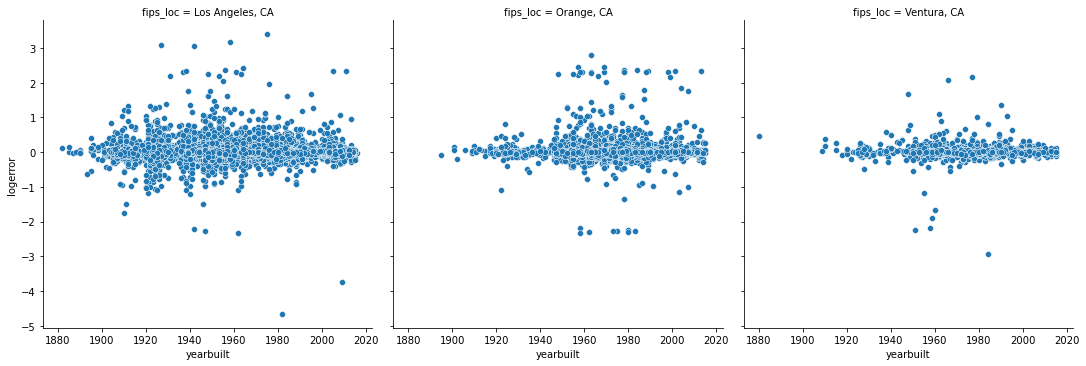

In [17]:
# plot yearbuilt vs logerror
sns.relplot(data=train, x='yearbuilt', y='logerror', col='fips_loc')

- In Los Angeles county, it appears that homes built between 1940 and 1980 have the greatest logerror. 
- In Orange county, the logerror is greatest from about 1950 onward.
- In Ventura county, the greatest logerror appears to be between 1950 and 1990.
 - The majority of the properties in this county have a smaller logerror than properties in other counties.

I want to perform three T-tests to see if my assumptions from looking at the visualizations are correct.

##### Question 5a. In Los Angeles county, is logerror significantly higher for homes built between 1940 and 1980?

one-tailed, one-sample t-test: reject $H_{0}$ only if 𝑝/2 < 𝛼 and 𝑡 > 0

$H_{0}$: The mean logerror for homes built in Los Angeles county between 1940 and 1980 is equal to the mean logerror for all homes in Los Angeles county.

$H_{a}$: The mean logerror for homes built in Los Angeles county between 1940 and 1980 is significantly greater than the mean logerror for all homes built in Los Angeles county.

In [18]:
# set alpha
α = 0.05
# isolate sample to be tested against overall mean
la_sample = la_county_data[(la_county_data.yearbuilt >= 1940) & (la_county_data.yearbuilt <= 1980)].logerror
# run test
t, p = stats.ttest_1samp(la_sample, la_county_data.logerror.mean())

print(t, p/2, alpha)

if p/2 > α:
    print('Fail to reject the null')
elif t < 0:
    print('Fail to reject the null')
else:
    print('Reject the null hypothesis')

1.6495844979701972 0.04952546098985842 0.05
Reject the null hypothesis


##### Answer 5a: The mean logerror for homes built in Los Angeles county between 1940 and 1980 is significantly greater than the mean logerror for all homes built in Los Angeles county.

##### Question 5b. In Orange county, is logerror significantly higher for homes built during or after 1950 than for homes built before 1950?

one-tailed, two-sample t-test: reject $H_{0}$ only if 𝑝/2 < 𝛼 and 𝑡 > 0

$H_{0}$: The mean logerror for homes built in Orange county 1950 or later is equal to the mean logerror for homes built before 1950 in Orange county.

$H_{a}$: The mean logerror for homes built in Orange county 1950 or later is significantly greater than the mean logerror for homes built before 1950 in Orange county.

In [19]:
# set alpha
α = 0.05
# isolate samples
or_sample_newer = orange_county_data[orange_county_data.yearbuilt >= 1950].logerror
or_sample_older = orange_county_data[orange_county_data.yearbuilt < 1950].logerror

In [20]:
# run test
t, p = stats.ttest_ind(or_sample_newer, or_sample_older)
# print test statistics
print(t, p/2, alpha)
# print test result
if p/2 > α:
    print('Fail to reject the null')
elif t < 0:
    print('Fail to reject the null')
else:
    print('Reject the null hypothesis')

-1.3573066343991165 0.0873570988018982 0.05
Fail to reject the null


##### Answer 5b: In Orange county, the mean logerror for homes built during or after 1950 is not significantly greater than the mean logerror for homes built before 1950.

 - Is it lower?

##### Question 5c. In Ventura county, is logerror significantly different for homes built between 1950 and 1990?

$H_{0}$: The mean logerror is not significantly different for homes built in Ventura county between 1950-1990 and all homes built in Ventura county.

*(Mean logerror of homes built in Ventura county 1950-1990 == Mean logerror of all homes built in Ventura county)*

$H_{a}$: The mean logerror is significantly different for homes built in Ventura county between 1950-1990 and all homes built in Ventura county.

*(Mean logerror of homes built in Ventura county 1950-1990 != Mean logerror of all homes built in Ventura county)*

In [21]:
# set alpha
α = 0.05
# isolate sample to be tested against overall mean
ve_sample = ventura_county_data[(ventura_county_data.yearbuilt >= 1950) & (ventura_county_data.yearbuilt <= 1990)].logerror
# run test
t, p = stats.ttest_1samp(ve_sample, ventura_county_data.logerror.mean())

print(t, p/2, alpha)

if p/2 > α:
    print('Fail to reject the null')
elif t < 0:
    print('Fail to reject the null')
else:
    print('Reject the null hypothesis')

-0.7496027657112982 0.22678889411343894 0.05
Fail to reject the null


##### Answer 5c: The mean logerror for homes built in Ventura county between 1950 and 1990 is not significantly different from the mean logerror for all homes built in Ventura county.

#### Question 6: Does logerror vary across number of bedrooms? Number of bathrooms?

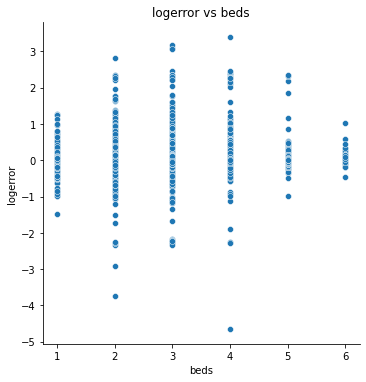

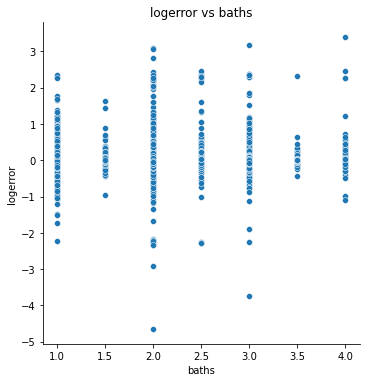

In [22]:
sns.relplot(data=train, x='beds', y='logerror').set(title='logerror vs beds')
sns.relplot(data=train, x='baths', y='logerror').set(title='logerror vs baths')

In [23]:
from datetime import date
train['age'] = date.today().year - train.yearbuilt

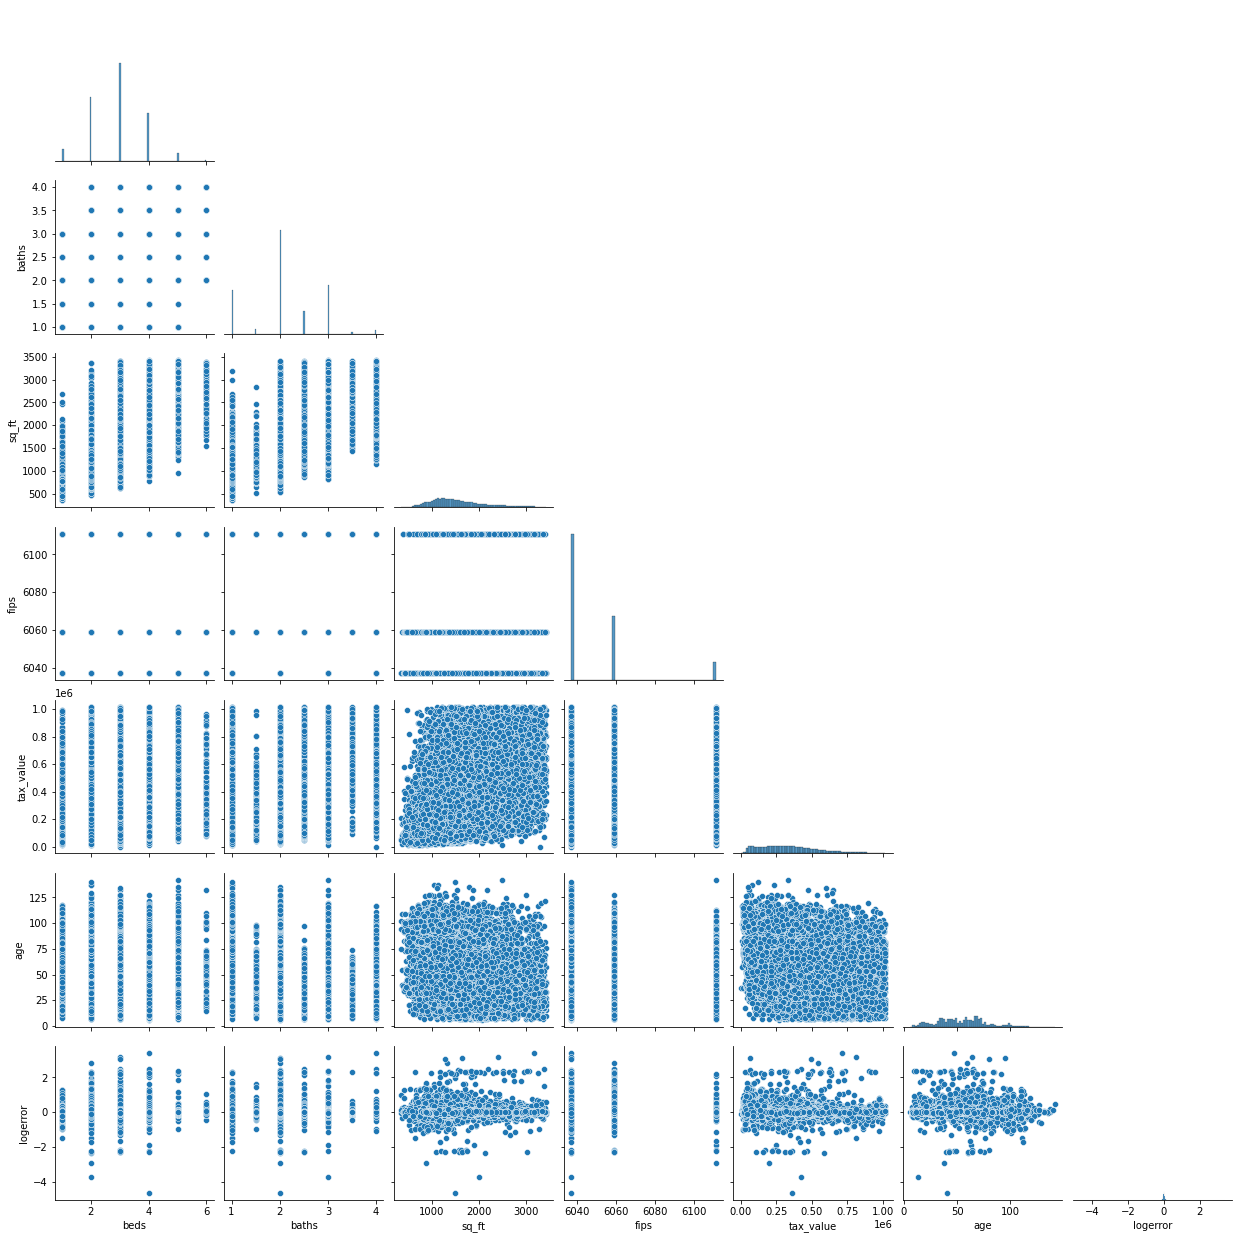

In [24]:
sns.pairplot(data=train[['beds','baths','sq_ft', 'fips', 'tax_value', 'age', 'logerror']], corner=True)

- Los Angeles county has the most logerror, both positive and negative.
- Orange county's logerror is most often positive
- Ventura county's logerror also appears to be positive more often than negative, but to a lesser degree than Orange county

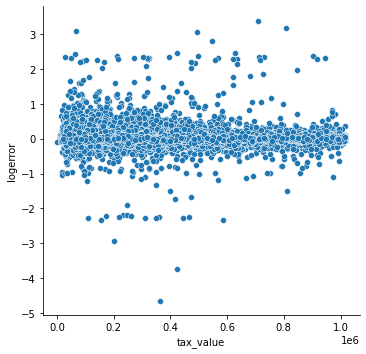

In [25]:
sns.relplot(data=train, x='tax_value', y='logerror')

In [26]:
train[train.rooms == 0]

,baths,beds,sq_ft,fips,fullbaths,latitude,longitude,rooms,yearbuilt,tax_value,logerror,transactiondate,fips_loc,age
18818,3.0,3.0,1683.0,6037,3.0,33874056.0,-118365638.0,0.0,1986.0,331062.0,-0.009760,2017-03-21,"Los Angeles, CA",36.0
52227,2.0,3.0,1085.0,6037,2.0,34616142.0,-117811587.0,0.0,1987.0,109644.0,-0.023405,2017-06-30,"Los Angeles, CA",35.0
25353,3.0,3.0,2030.0,6037,3.0,34135615.0,-118502375.0,0.0,1966.0,127529.0,-0.009772,2017-04-11,"Los Angeles, CA",56.0
56877,2.0,3.0,1684.0,6037,2.0,34212322.0,-118214747.0,0.0,1942.0,81966.0,-0.006403,2017-07-14,"Los Angeles, CA",80.0
42165,2.0,3.0,1365.0,6037,2.0,34131627.0,-118140030.0,0.0,1905.0,54621.0,0.005379,2017-06-01,"Los Angeles, CA",117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7305,2.0,3.0,1100.0,6037,2.0,34170400.0,-118599000.0,0.0,1987.0,373000.0,-0.023329,2017-02-01,"Los Angeles, CA",35.0
71272,1.0,2.0,1344.0,6037,1.0,34081933.0,-118264865.0,0.0,1921.0,811381.0,0.153665,2017-08-29,"Los Angeles, CA",101.0
52834,1.0,2.0,1258.0,6037,1.0,34075384.0,-118059542.0,0.0,1948.0,45921.0,-0.132266,2017-06-30,"Los Angeles, CA",74.0
36378,1.0,1.0,599.0,6037,1.0,34171400.0,-118609000.0,0.0,1979.0,145631.0,-0.196433,2017-05-16,"Los Angeles, CA",43.0


`rooms` seems to be a basically useless column, at least for what we intended to use it for. Just within the train dataset, 26,960 properties have a `rooms` value of 0 but all of these properties have at least one room since we filtered out all properties with no bedrooms or bathrooms in the wrangle step. I don't think we should use this column after all, at least not at this stage.

So I can get out of the rabbit hole I feel myself going down in this notebook, I'll move on to some clustering for now and try to gain more insights from that.

## Clustering
---

Before I can actually begin clustering, I need to pick some features to start with and scale my data.

For my initial features, I will use:
- `age`
- `tax_value`
- `sq_ft`

In [27]:
# imports for clustering and scaling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# define independent variables
X = train[['age', 'tax_value', 'sq_ft']]
X.head()

,age,tax_value,sq_ft
18818,36.0,331062.0,1683.0
52227,35.0,109644.0,1085.0
25353,56.0,127529.0,2030.0
73264,63.0,180075.0,1652.0
56877,80.0,81966.0,1684.0


In [28]:
# scale features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_scaled.head()

,age,tax_value,sq_ft
0,-0.770150,-0.135195,0.208523
1,-0.814908,-1.143307,-0.821472
2,0.125017,-1.061877,0.806196
3,0.438326,-0.822636,0.155128
4,1.199217,-1.269324,0.210245


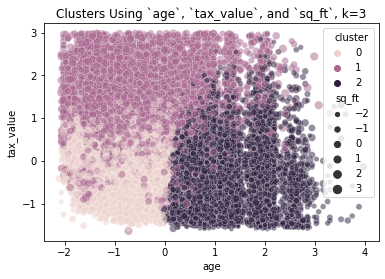

In [29]:
# create kmeans object
kmeans = KMeans(n_clusters=3, random_state=123)
# fit object
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)
# create columns for predictions
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
# visualize clusters
sns.scatterplot(x='age', y='tax_value', size='sq_ft', data=X_scaled, hue='cluster', alpha=0.5)
plt.title('Clusters Using `age`, `tax_value`, and `sq_ft`, k=3');

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

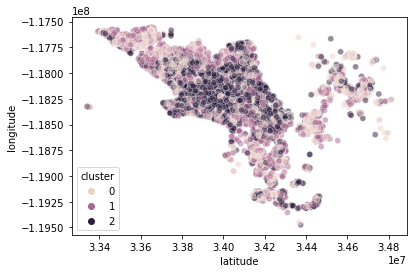

In [30]:
sns.scatterplot(x='latitude', y='longitude', data=train, hue='cluster', alpha=0.5)

Location does not seem to align with the clusters created based on `age`, `tax_value`, and `sq_ft`.

These clusters are interesting. I would like it if we could make it into a 3D visualization similar to the one Brian demonstrated in class. For now, I will try out other combinations of features we've deemed potentially relevant to see if the clusters become more defined.

Before moving on to other features, I want to see if I can get better clusters with these features by using a different k-value so I'll use the elbow method to see if I can get a good idea of what k-value to use.

Text(0.5, 1.0, 'Inertia as k Changes')

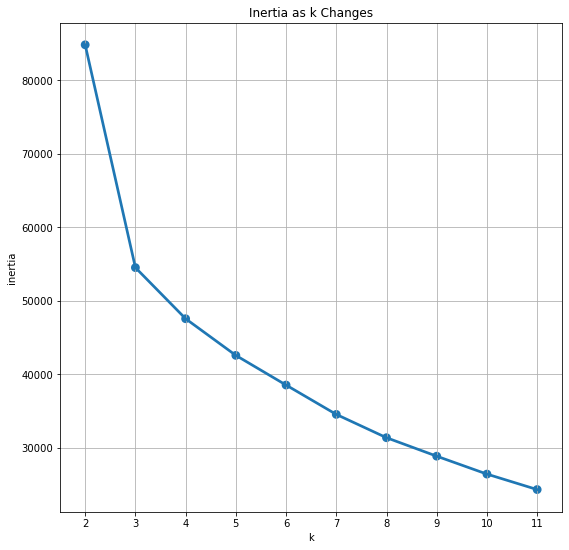

In [31]:
# create dataframe of k vs inertia
k_inertia_df = pd.DataFrame({'k':range(2, 12), 'inertia':[KMeans(k).fit(X_scaled).inertia_ for k in range(2,12)]})
# plot k vs inertia
plt.figure(figsize=(9, 9))
sns.pointplot(data=k_inertia_df, x='k', y='inertia')
plt.grid()
plt.title('Inertia as k Changes')

It looks like 3 was a pretty good k-value to use, but I also want to see what the clusters look like with k=4 and k=5.

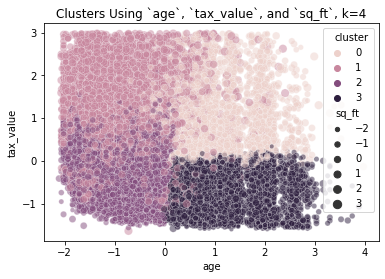

In [32]:
# create kmeans object
kmeans = KMeans(n_clusters=4, random_state=123)
# fit object
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)
# create columns for predictions
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
# visualize clusters
sns.scatterplot(x='age', y='tax_value', size='sq_ft', data=X_scaled, hue='cluster', alpha=0.5)
plt.title('Clusters Using `age`, `tax_value`, and `sq_ft`, k=4');

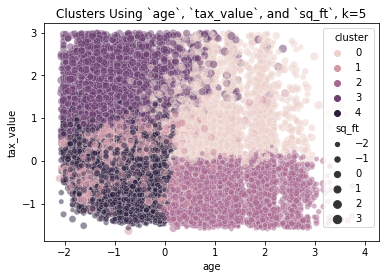

In [33]:
# create kmeans object
kmeans = KMeans(n_clusters=5, random_state=123)
# fit object
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)
# create columns for predictions
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
# visualize clusters
sns.scatterplot(x='age', y='tax_value', size='sq_ft', data=X_scaled, hue='cluster', alpha=0.5)
plt.title('Clusters Using `age`, `tax_value`, and `sq_ft`, k=5');

5 is definitely too high of a k-value for these features; cluster 1 is not defined at all, it is just muddled with the other clusters.

For my next round of clustering I'll try:
- `beds`
- `baths`
- `age`

Text(0.5, 1.0, 'Inertia as k Changes')

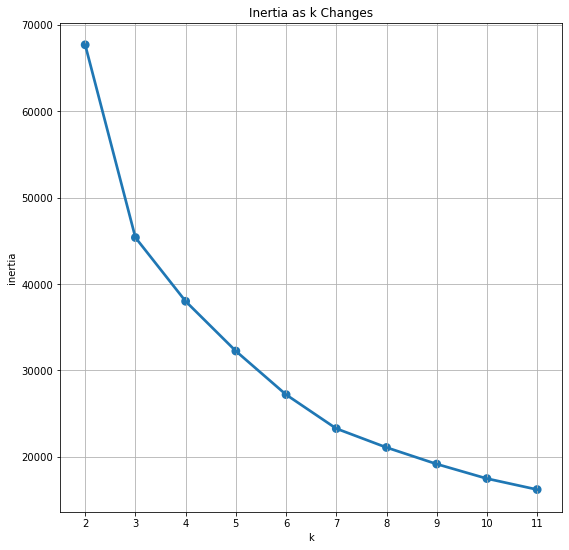

In [34]:
# define independent variables
X = train[['latitude', 'longitude', 'age']]
X.head()
# scale features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)

# create dataframe of k vs inertia
k_inertia_df = pd.DataFrame({'k':range(2, 12), 'inertia':[KMeans(k).fit(X_scaled).inertia_ for k in range(2,12)]})
# plot k vs inertia
plt.figure(figsize=(9, 9))
sns.pointplot(data=k_inertia_df, x='k', y='inertia')
plt.grid()
plt.title('Inertia as k Changes')

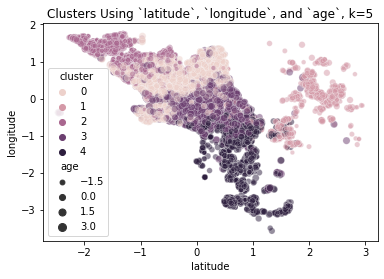

In [35]:
# create kmeans object
kmeans = KMeans(n_clusters=5, random_state=123)
# fit object
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)
# create columns for predictions
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
# visualize clusters
sns.scatterplot(x='latitude', y='longitude', size='age', data=X_scaled, hue='cluster', alpha=0.5)
plt.title('Clusters Using `latitude`, `longitude`, and `age`, k=5');

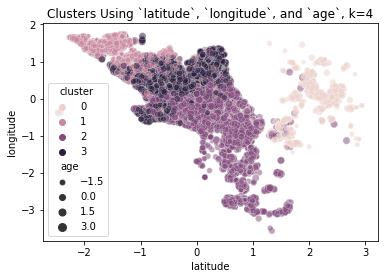

In [36]:
# create kmeans object
kmeans = KMeans(n_clusters=4, random_state=123)
# fit object
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)
# create columns for predictions
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
# visualize clusters
sns.scatterplot(x='latitude', y='longitude', size='age', data=X_scaled, hue='cluster', alpha=0.5)
plt.title('Clusters Using `latitude`, `longitude`, and `age`, k=4');

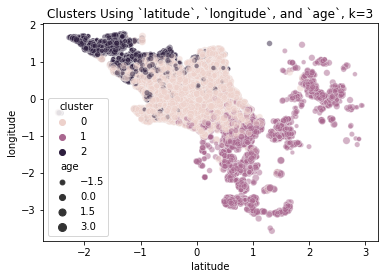

In [37]:
# create kmeans object
kmeans = KMeans(n_clusters=3, random_state=123)
# fit object
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)
# create columns for predictions
train['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
# visualize clusters
sns.scatterplot(x='latitude', y='longitude', size='age', data=X_scaled, hue='cluster', alpha=0.5)
plt.title('Clusters Using `latitude`, `longitude`, and `age`, k=3');

These visualizations are nice to look at but they don't tell much besides where the property is located. It is probably a better idea to cluster on other features and then visualize them using latitude/longitude to see where those clusters fall geographically. At that point, we can determine if clusters are more closely associated with a certain geographic area.

Text(0.5, 1.0, 'Inertia as k Changes')

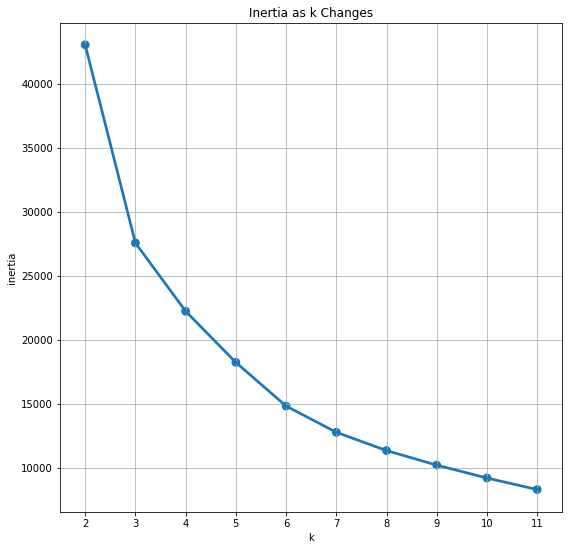

In [38]:
# define independent variables
X = train[['sq_ft', 'age']]
X.head()
# scale features
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)

# create dataframe of k vs inertia
k_inertia_df = pd.DataFrame({'k':range(2, 12), 'inertia':[KMeans(k).fit(X_scaled).inertia_ for k in range(2,12)]})
# plot k vs inertia
plt.figure(figsize=(9, 9))
sns.pointplot(data=k_inertia_df, x='k', y='inertia')
plt.grid()
plt.title('Inertia as k Changes')

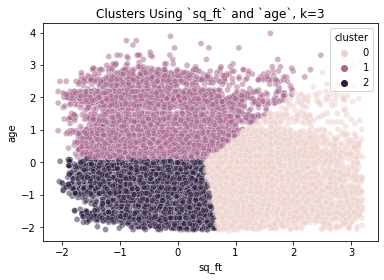

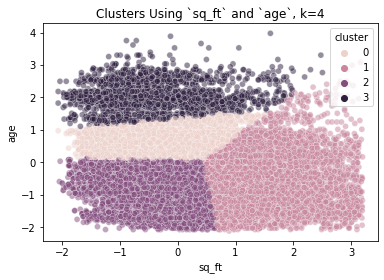

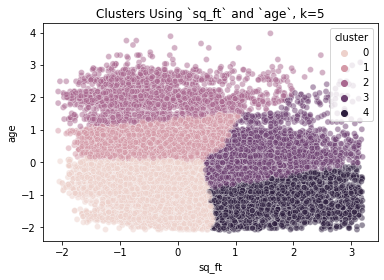

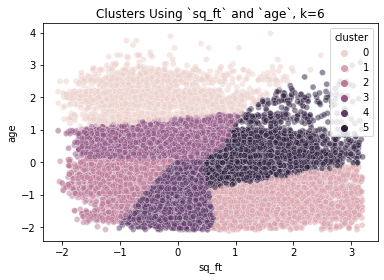

In [39]:
# create for loop to visualize different k-values
for k in range(3,7):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    X_scaled['cluster'] = kmeans.predict(X_scaled)
    sns.scatterplot(x='sq_ft', y='age', data=X_scaled, hue='cluster', alpha=0.5)
    plt.title(f'Clusters Using `sq_ft` and `age`, k={k}')
    plt.show();

In [40]:
def clusters_by_location(features):
    X = train[features]
    scaler = StandardScaler().fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
    for k in range(3,11):
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans.fit(X_scaled)
        kmeans.predict(X_scaled)
        train['cluster'] = kmeans.predict(X_scaled)
        X_scaled['cluster'] = kmeans.predict(X_scaled)
        sns.scatterplot(x='latitude', y='longitude', data=train, hue='cluster', alpha=0.5)
        plt.title(f'GeoLocations of Clusters Using {features}, k={k}')
        plt.show();
    return plt.show();

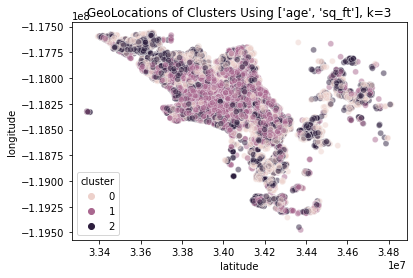

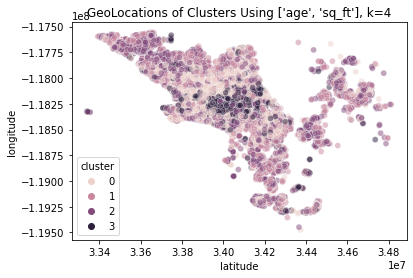

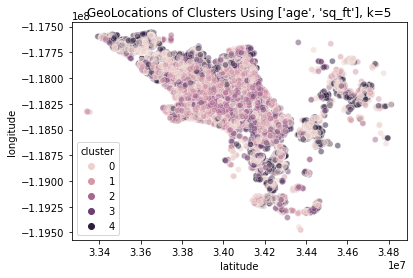

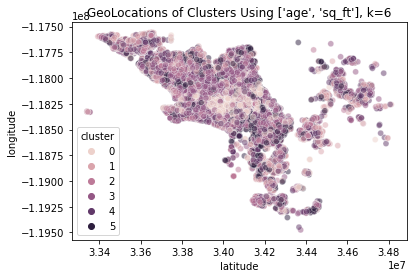

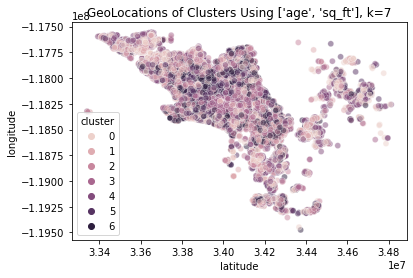

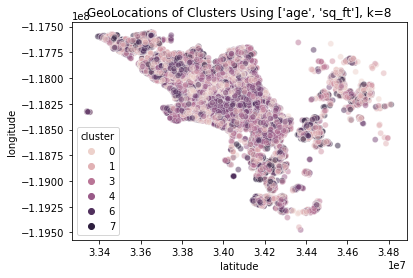

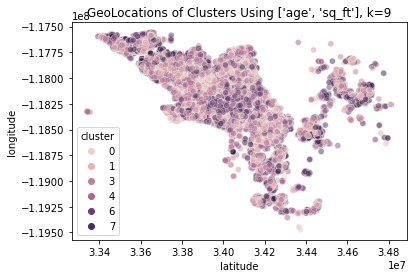

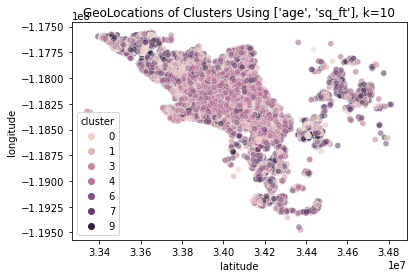

In [41]:
clusters_by_location(['age', 'sq_ft'])

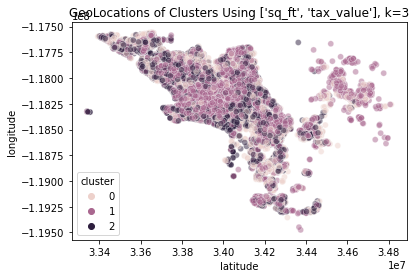

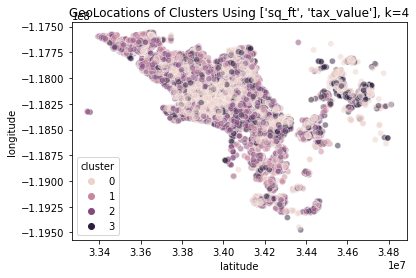

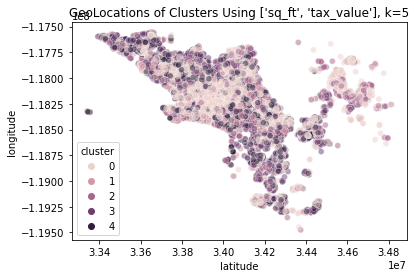

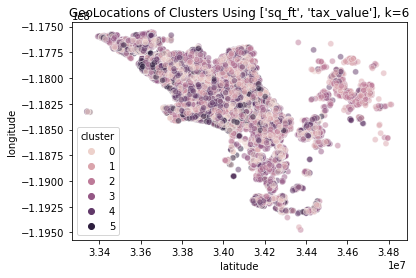

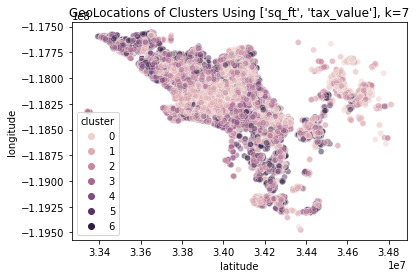

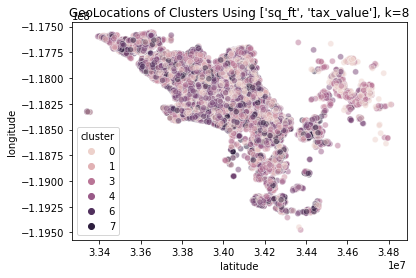

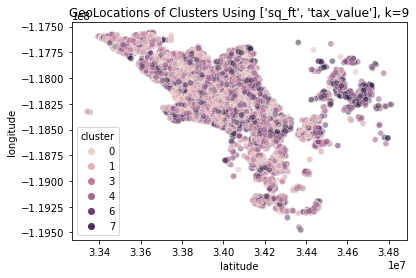

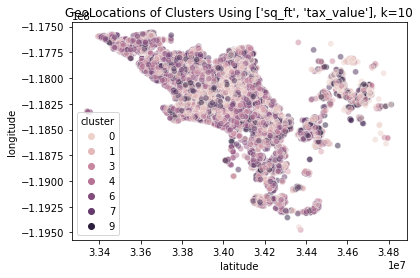

In [42]:
clusters_by_location(['sq_ft', 'tax_value'])

Right now I'm not really getting much insight from looking at where on a map the clusters are located, so I'll put this branch of exploration on the backburner for now.

I still want to find which features will create meaningful clusters so I'll try to do that next by comparing mean logerror for clusters using the same set of features, and repeating for other sets of features.